In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('adult.csv',skipinitialspace=True)

In [3]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include=['O'])

In [ ]:
data.info()

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.groupby('workclass')['workclass'].count().sort_values(ascending=False)

In [ ]:
data.columns

In [ ]:
data.groupby('marital-status')['marital-status'].count().sort_values(ascending=False)

In [22]:
data.groupby('occupation')['occupation'].count().sort_values(ascending=False)

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data.groupby('race')['race'].count().sort_values(ascending=False)

In [11]:
data.groupby('relationship')['relationship'].count()

relationship
Husband           12704
Not-in-family      7865
Other-relative      918
Own-child          4525
Unmarried          3271
Wife               1435
Name: relationship, dtype: int64

In [4]:
#每列是问号的总数
def cc(x):
    return sum(x=='?')
data.apply(cc)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Salary               0
dtype: int64

In [5]:
#空值重合总数
data.loc[data['workclass']=='?'].apply(cc)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country      27
Salary               0
dtype: int64

In [5]:
data=data[data['occupation']!='?']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education-num     30718 non-null int64
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30718 non-null object
Salary            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
data.apply(cc)

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
Salary              0
dtype: int64

In [6]:
data.loc[data['native-country']!='United-States','native-country']='non-USA'

# map categorical data

In [7]:
#mapping workclass
#data['workclass'] = data['workclass'].map({'Private':0,'Self-emp-not-inc':1,'Local-gov':2,'State-gov':3,'Self-emp-inc':4,'Federal-gov':5,'Without-pay':6}).astype(int)
wc=pd.get_dummies(data['workclass'],columns='workclass',prefix='workclass')


In [9]:
#ms=pd.get_dummies(data['marital-status'],columns='marital-status',prefix='marital-status')
#mapping marital-status
data['marital-status'] = data['marital-status'].replace(['Never-married','Divorced','Separated','Widowed'],'Single')
data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],'Married')
#data['marital-status'] = data['marital-status'].map({'Married':0,'Single':1}).astype(int)
ms = pd.get_dummies(data['marital-status'],columns='marital-status',prefix='marital-status')


In [10]:
#mapping occupation
#data['occupation'] = data['occupation'].map({'Prof-specialty':0,'Craft-repair':1,'Exec-managerial':2,'Adm-clerical':3,'Sales':4,'Other-service':5,'Machine-op-inspct':6,'Transport-moving':7,'Handlers-cleaners':8,'Farming-fishing':9,'Tech-support':10,'Protective-serv':11,'Priv-house-serv':12,'Armed-Forces':13}).astype(int)
#data.head(30)
occ=pd.get_dummies(data['occupation'],columns='occupaition',prefix='occupation')


In [12]:
rs=pd.get_dummies(data['relationship'],columns='relationship',prefix='relationship')

In [13]:
#mapping race
#data['race'] = data['race'].map({'White':0,'Black':2,'Asian-Pac-Islander':3,'Amer-Indian-Eskimo':4,'Other':5}).astype(int)
race = pd.get_dummies(data['race'],columns='race',prefix='race')


In [14]:
data['sex']=data['sex'].map( {'Female': 1, 'Male': 0} ).astype(int)
#sex = pd.get_dummies(data['sex'],columns='sex',prefix='sex')

In [15]:
#data.loc[ data['Salary'] == '<=50K', 'Salary'] = 0
#data.loc[ data['Salary'] == '>50K', 'Salary'] = 1
data['Salary']=data['Salary'].map( {'<=50K': 1, '>50K': 0} ).astype(int)



In [16]:
data['native-country'] = data['native-country'].map({'United-States':0,'non-USA':1}).astype(int)

In [17]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,0,2174,0,40,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,0,0,0,13,0,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,0,0,0,40,0,1
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,0,0,0,40,0,1
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,1,0,0,40,1,1


In [18]:
pd.concat([data,wc,ms,occ,rs,race],axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,0,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,0,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,1,...,0,0,0,0,1,0,0,1,0,0
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,1,...,0,0,0,0,1,0,0,0,0,1
6,49,Private,160187,9th,5,Married,Other-service,Not-in-family,Black,1,...,1,0,0,0,0,0,0,1,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married,Exec-managerial,Husband,White,0,...,0,0,0,0,0,0,0,0,0,1
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,1,...,1,0,0,0,0,0,0,0,0,1
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data = data.drop(['workclass','education','marital-status','occupation','relationship','race'],axis=1)

# check data leakage

In [29]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Salary'],
      dtype='object')

In [32]:
target = data['Salary']
features = data.drop('Salary',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fbde080>,
      dtype=object)

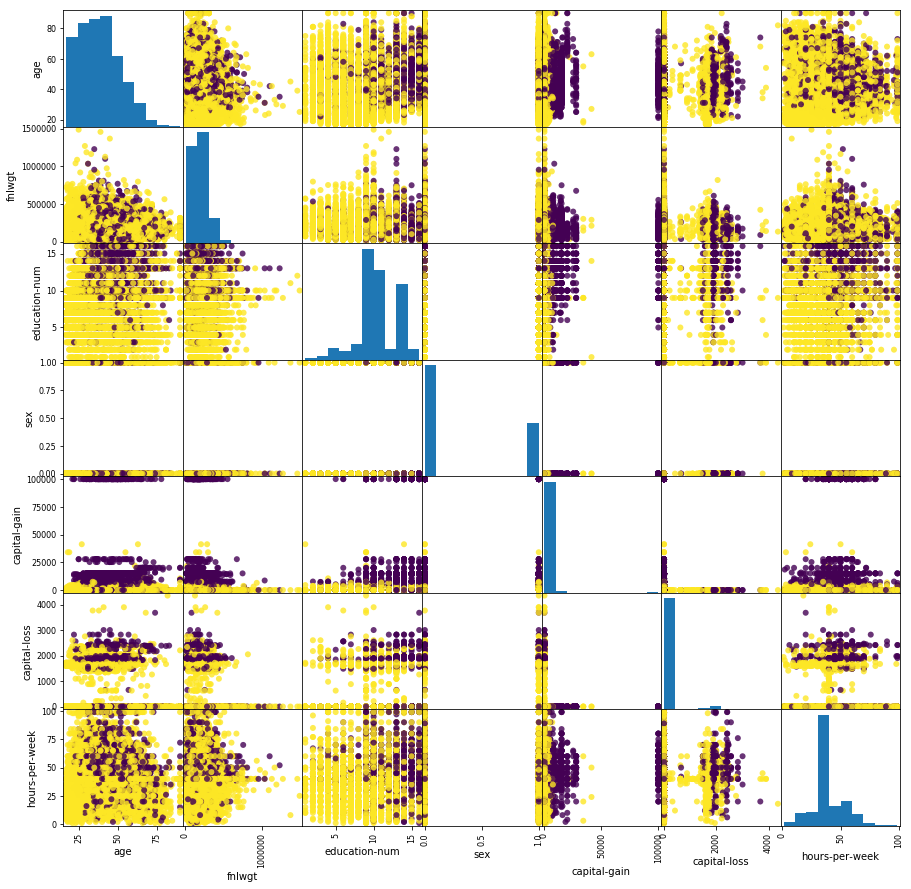

In [37]:
%matplotlib inline
from pandas.plotting import scatter_matrix


X = pd.DataFrame(data, columns=data.columns)
y = target

attributes = data.columns[:7]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

# KNneighbors

In [39]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [40]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [43]:
X_train

array([[-0.7905918 , -0.54783789,  1.12000118, ..., -0.21964134,
        -0.07313419, -0.34259768],
       [ 0.6545922 , -0.07855361, -0.44102471, ..., -0.21964134,
        -0.07313419, -0.34259768],
       [ 0.35034293, -1.34547158,  1.12000118, ..., -0.21964134,
        -0.07313419, -0.34259768],
       ...,
       [-0.86665412, -0.90769128,  0.33948824, ..., -0.21964134,
        -0.07313419, -0.34259768],
       [-0.7905918 ,  0.88298974, -0.05076824, ..., -0.21964134,
         2.01126994, -0.34259768],
       [-0.41028022, -0.43437435,  1.12000118, ..., -0.21964134,
         0.76062746, -0.34259768]])

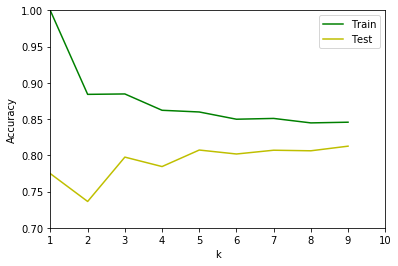

In [45]:
%matplotlib inline
train_array=[]
test_array=[]
x_axis=range(1,10)
for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)
line1, = plt.plot(x_axis,train_array, c='g',label='Train')
line2, = plt.plot(x_axis,test_array,c='y',label='Test')
plt.axis([1,10,0.7,1])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(handles=[line1,line2],loc=1)

In [46]:
X_train.shape

(23038, 8)

In [47]:
X_test.shape

(7680, 8)

In [48]:
knn=KNeighborsClassifier(4)
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
print('Train score=',train_score,'Test score=',test_score)
    


Train score= 0.8621408108342739 Test score= 0.7845052083333334


In [49]:
X.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,77516,13,0,2174,0,40,0
1,50,83311,13,0,0,0,13,0
2,38,215646,9,0,0,0,40,0
3,53,234721,7,0,0,0,40,0
4,28,338409,13,1,0,0,40,1


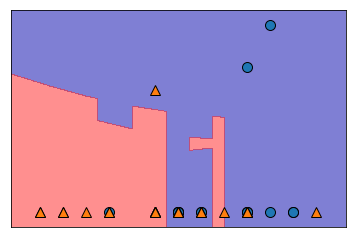

In [51]:
import mglearn
X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(4)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.5)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

# LinearRegression

In [52]:
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [53]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.24919263515801748
0.25733506384015603


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0.5,0,'RM')

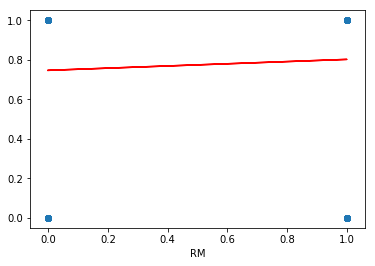

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,7].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

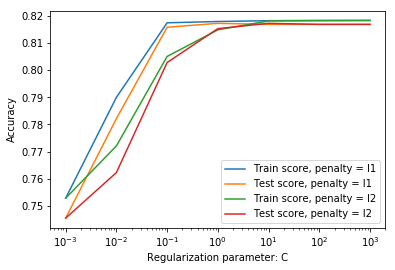

In [56]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

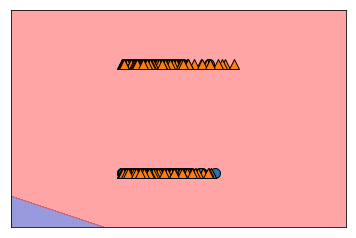

In [62]:
X_b = X_train[10:2000, [1,3]]
y_b = y_train[10:2000]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

# Decision tree

In [63]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.774


In [74]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.821


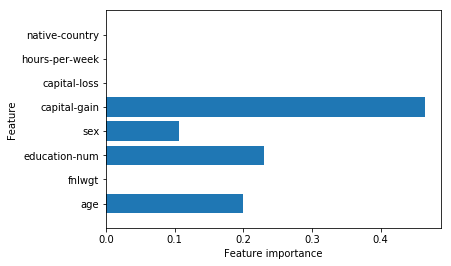

In [77]:
%matplotlib inline
def plot_feature_importances_income(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_income(dtree)

In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

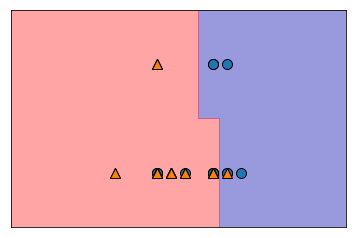

In [78]:
import mglearn
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[2,7]]
y_b = y_train[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(dtree, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

# SVM